# 1. Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

# 2. Load data

170498071/170498071 [==============================] - 4s 0us/step


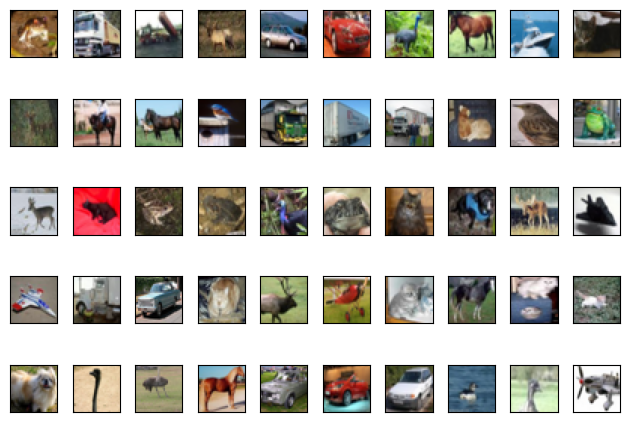

In [3]:
# Load CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

fig = plt.figure()
for i in range(50):
  ax = fig.add_subplot(5, 10, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i])

plt.tight_layout()
plt.show()

# 3. Pre-process data

In [4]:
# Normalizing between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
#plt.imshow(x_train[0])

In [5]:
# Find num_of_classes and converting to one-hot
num_classes = len(np.unique(y_train))
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

print('Before one-hot: ', y_train[:5])
print('After one-hot: ', Y_train[:5])

Before one-hot:  [[6]
 [9]
 [9]
 [4]
 [1]]
After one-hot:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
# Split to validation set from train set
X_train, X_valid = X_train[5000:, ...], X_train[:5000, ...]
Y_train, Y_valid = Y_train[5000:, ...], Y_train[:5000, ...]

print(f"{X_train.shape[0]} train examples")
print(f"{X_valid.shape[0]} valid examples")
print(f"{X_test.shape[0]} test examples")
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"Y_valid shape: {Y_valid.shape}")

45000 train examples
5000 valid examples
10000 test examples
X_train shape: (45000, 32, 32, 3)
Y_train shape: (45000, 10)
X_valid shape: (5000, 32, 32, 3)
Y_valid shape: (5000, 10)


# 4. Build CNN

In [ ]:
# Build model
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

In [ ]:
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='cifar10_first_cnn.weights.best.hdf5',
                               verbose=1,
                               save_best_only=True)

hist = model.fit(X_train, Y_train,
                 validation_data=(X_valid, Y_valid),
                 batch_size=500, epochs=50,
                 callbacks=[checkpointer],
                 verbose=1, shuffle=True)

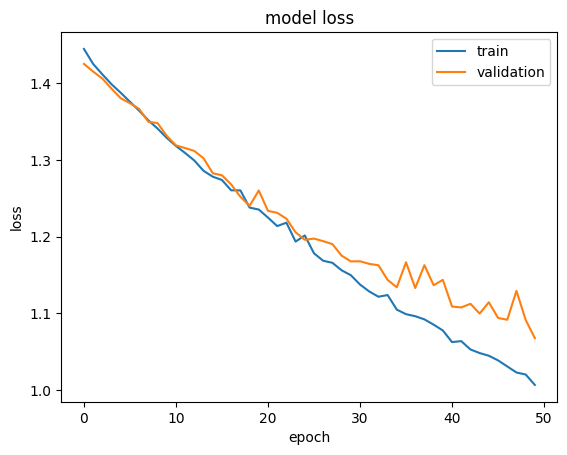

In [10]:
# Plot learning curve
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [11]:
# Load the best model
model.load_weights('/content/cifar10_first_cnn.weights.best.hdf5')

# Save the best model
model.save('cifar10_first_cnn.keras')

# 5. Evaluate

In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test accuracy: {score[1] * 100}%")

Test accuracy: 61.77999973297119%


# 6. Load model again

In [9]:
# Build model
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=X_train.shape[1:]))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [10]:
model.load_weights('/content/cifar10_first_cnn.weights.best.hdf5')

In [14]:
#sgd = SGD(learning_rate=0.01)
#model.compile(optimizer=sgd,
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test accuracy: {score[1] * 100}%")

Test accuracy: 61.77999973297119%


In [15]:
from tensorflow.keras.models import load_model

model_2 = load_model('/content/cifar10_first_cnn.keras')

In [16]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(f"Test accuracy: {score[1] * 100}%")

Test accuracy: 61.77999973297119%


# 7. Train again

In [20]:
hist = model.fit(X_train, Y_train,
                 validation_data=(X_valid, Y_valid),
                 batch_size=500, epochs=200,
                 verbose=1, shuffle=True)

Epoch 1/200
90/90 [==============================] - 1s 15ms/step - loss: 0.7253 - accuracy: 0.7522 - val_loss: 1.0659 - val_accuracy: 0.6378
Epoch 2/200
90/90 [==============================] - 1s 10ms/step - loss: 0.7421 - accuracy: 0.7479 - val_loss: 1.0053 - val_accuracy: 0.6540
Epoch 3/200
90/90 [==============================] - 1s 13ms/step - loss: 0.7242 - accuracy: 0.7522 - val_loss: 1.0584 - val_accuracy: 0.6360
Epoch 4/200
90/90 [==============================] - 1s 14ms/step - loss: 0.7186 - accuracy: 0.7541 - val_loss: 1.0143 - val_accuracy: 0.6542
Epoch 5/200
90/90 [==============================] - 1s 13ms/step - loss: 0.7118 - accuracy: 0.7565 - val_loss: 1.0298 - val_accuracy: 0.6464
Epoch 6/200
90/90 [==============================] - 1s 11ms/step - loss: 0.7101 - accuracy: 0.7582 - val_loss: 1.0112 - val_accuracy: 0.6456
Epoch 7/200
90/90 [==============================] - 1s 11ms/step - loss: 0.6986 - accuracy: 0.7614 - val_loss: 1.0146 - val_accuracy: 0.6496
Epoch 